In [1]:
import sys
sys.path.insert(0,'../caffe/python')

import caffe
import numpy as np
from matplotlib import pylab as pl
import os
import cv2
import sys
import time
import anno_func, json
import commands as cmd
import random
import copy
%matplotlib inline

In [2]:
datadir = "../../data"

filedir = datadir + "/annotations.json"
ids = open(datadir + "/test/ids.txt").read().splitlines()

annos = json.loads(open(filedir).read())

In [3]:
#results_annos = json.loads(open("../results/my_tt100k_iter_40000_result_annos.json").read())
#results_annos = json.loads(open("../results/TT100K_baselr_change_iter_40000_result_annos.json").read())

#results_annos = json.loads(open("../results/my_tt100k_iter_86000_result_annos.json").read())
#results_annos = json.loads(open("../results/ours_result_annos.json").read())
#results_annos = json.loads(open("../results/ours_result_annos.json").read())
#results_annos = json.loads(open("../results/fastrcnn_result_annos.json").read())
#results_annos_sm = json.loads(open("../results/fastrcnn_result.json").read())

#results_annos = json.loads(open("../results/TT100K_TRAIN_01_Iter_40000_result_annos.json").read())
results_annos = json.loads(open("../results/TT100K_TRAIN_01_Iter_40000_T1_result_annos.json").read())


print "results_annos, # of test dataset : ", len(results_annos['imgs'])
#print "results_annos, # of test dataset : ", len(results_annos_sm)
#print results_annos_sm['report']

results_annos, # of test dataset :  1


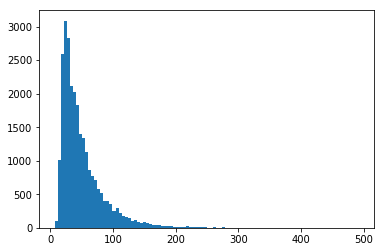

In [4]:
sizes = [ anno_func.box_long_size(obj['bbox']) 
         
for k,img in annos['imgs'].items() for obj in img['objects']]
_ = pl.hist(sizes, bins=100)

1
5


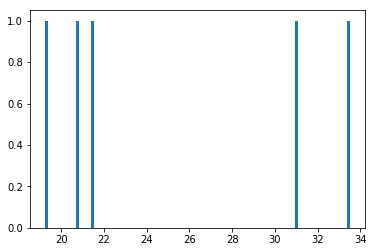

In [5]:
sizes = [ anno_func.box_long_size(obj['bbox']) 

for k,img in results_annos['imgs'].items() for obj in img['objects']]
_ = pl.hist(sizes, bins=100)

print len(results_annos['imgs'].items())
print len(sizes)

In [6]:
reload(anno_func)

test_annos = results_annos
minscore=40
iou=0.5

sm = anno_func.eval_annos(annos, test_annos, iou=iou, check_type=True, types=anno_func.type45,
                         minboxsize=0,maxboxsize=400,minscore=minscore)
print sm['report']
sm = anno_func.eval_annos(annos, test_annos, iou=iou, check_type=True, types=anno_func.type45,
                         minboxsize=0,maxboxsize=32,minscore=minscore)
print sm['report']
sm = anno_func.eval_annos(annos, test_annos, iou=iou, check_type=True, types=anno_func.type45,
                         minboxsize=32,maxboxsize=96,minscore=minscore)
print sm['report']
sm = anno_func.eval_annos(annos, test_annos, iou=iou, check_type=True, types=anno_func.type45,
                         minboxsize=96,maxboxsize=400,minscore=minscore)
print sm['report']

for tp in anno_func.type45:
    sm = anno_func.eval_annos(annos, test_annos, iou=iou, check_type=True, types=[tp],minscore=minscore)
    print sm['report']

iou:0.5, size:[0,400), types:[pl120, ...total 45...], accuracy:1.0, recall:0.8
iou:0.5, size:[0,32), types:[pl120, ...total 45...], accuracy:1.0, recall:0.75
iou:0.5, size:[32,96), types:[pl120, ...total 45...], accuracy:1.0, recall:1.0
iou:0.5, size:[96,400), types:[pl120, ...total 45...], accuracy:1, recall:1
iou:0.5, size:[0,400), types:i2, accuracy:1, recall:1
iou:0.5, size:[0,400), types:i4, accuracy:1, recall:1
iou:0.5, size:[0,400), types:i5, accuracy:1.0, recall:0.5
iou:0.5, size:[0,400), types:il100, accuracy:1, recall:1
iou:0.5, size:[0,400), types:il60, accuracy:1, recall:1
iou:0.5, size:[0,400), types:il80, accuracy:1, recall:1
iou:0.5, size:[0,400), types:io, accuracy:1, recall:1
iou:0.5, size:[0,400), types:ip, accuracy:1, recall:1
iou:0.5, size:[0,400), types:p10, accuracy:1, recall:1
iou:0.5, size:[0,400), types:p11, accuracy:1, recall:1
iou:0.5, size:[0,400), types:p12, accuracy:1, recall:1
iou:0.5, size:[0,400), types:p19, accuracy:1, recall:1
iou:0.5, size:[0,400), t

iou:0.5, size:[0,32), types:[pl120, ...total 45...], accuracy:0.822308690013, recall:0.866712235133
iou:0.5, size:[32,96), types:[pl120, ...total 45...], accuracy:0.913116726835, recall:0.941205656165
iou:0.5, size:[96,400), types:[pl120, ...total 45...], accuracy:0.905020352782, recall:0.87532808399

Sampling Image ID :  10056
((460.4088134765625, 898.9197387695312), (10.97500228881836, 32.48786926269531), 175.05258178710938)
max score: 363.0
obj category: pne , score : 363.0
obj category: pne , score : 321.0
obj category: i5 , score : 306.0
obj category: pne , score : 54.0
obj category: i5 , score : 0.0
(2048, 2048)


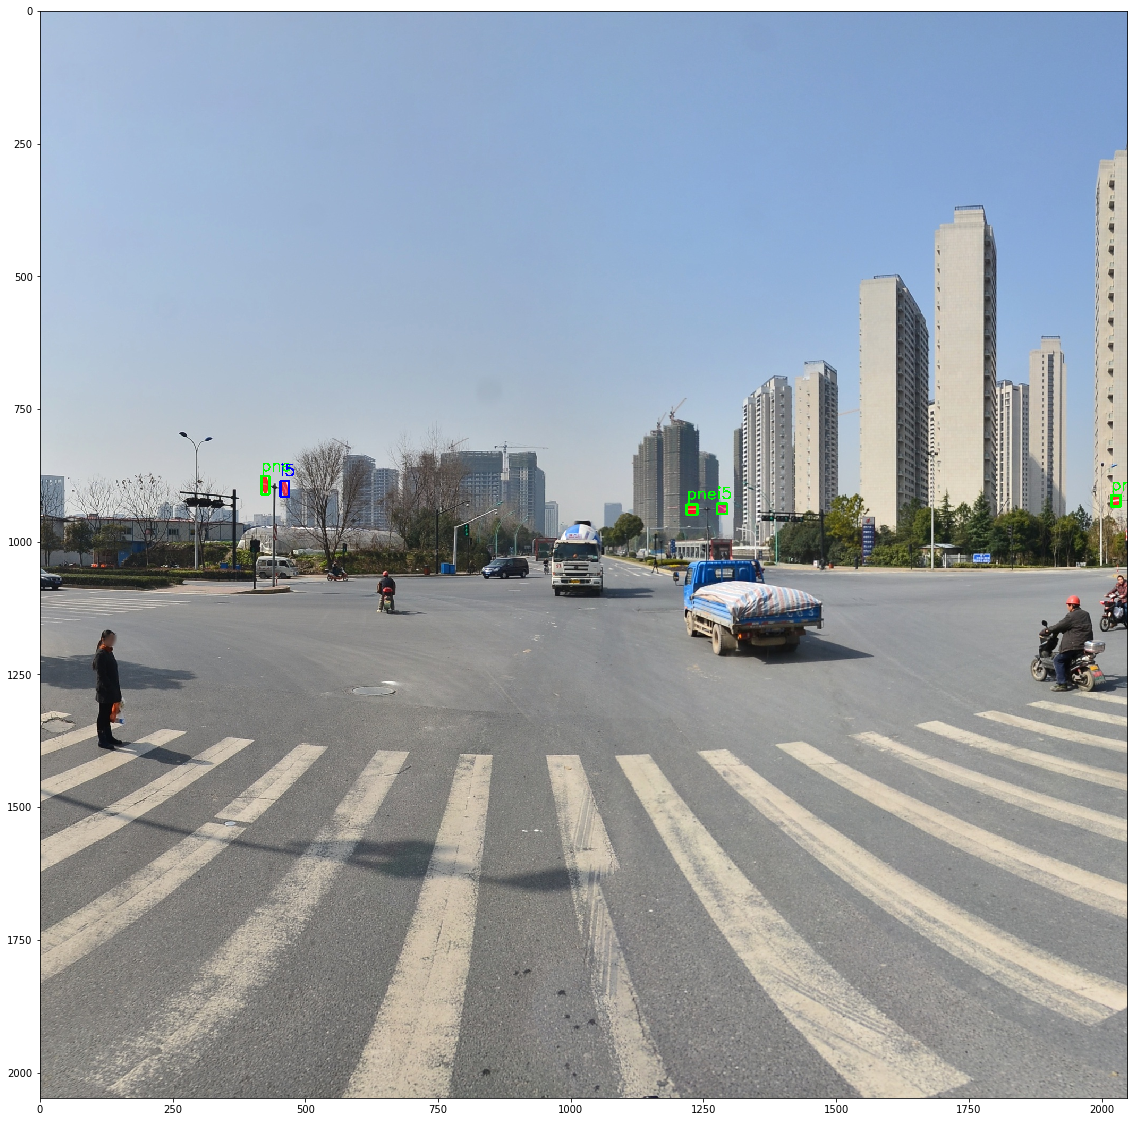

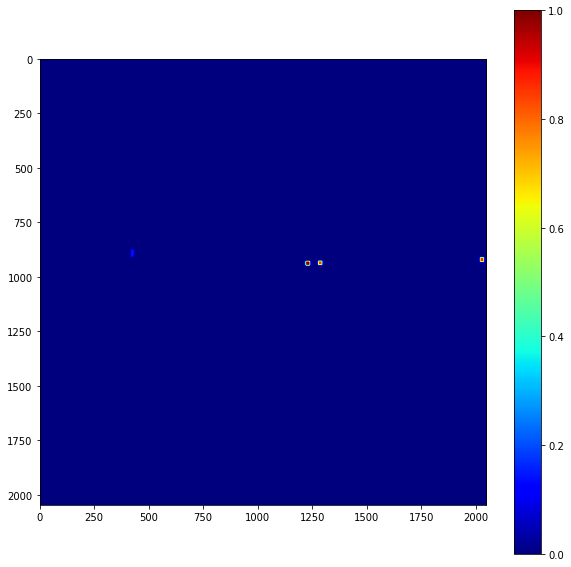

In [8]:
def draw_heatmap(annos, datadir, imgid, imgdata):
      
    heatmap = np.zeros_like(imgdata[:,:,0]).astype(np.float) 
    
    bbox_type = [annos['right'], annos['wrong'], annos['miss']]
    
    #print annos['right']
    
    max_score = 0.0
    
    for cur_bbox_type in bbox_type:
        
        img = cur_bbox_type["imgs"][imgid]
        
        for obj in img['objects']:
            if obj.get('score'):
                if obj['score'] > max_score:
                    max_score = obj['score']

    print "max score:", max_score
    
    for cur_bbox_type in bbox_type:
        
        img = cur_bbox_type["imgs"][imgid]
        #print img
      
        for obj in img['objects']:
            
            #print '>-----------------'
            #print obj
            #print '<-----------------'
            
            score = 0.0
            
            if obj.get('score'):
                score = obj['score']

            print "obj category:", obj['category'],", score :",score
                
            box = obj['bbox']
                          
            heat = 0.0
                          
            if score > 0.0 and max_score > 0.0 :
                heat = score/max_score
                heatmap[int(box['ymin']):int(box['ymax']), int(box['xmin']):int(box['xmax'])] += heat
            #print score
            #print "obj bounding box: ", int(box['xmin']),",",int(box['ymin']),",", int(box['xmax']),",",int(box['ymax'])
    
    #heatmap[heatmap <= 0.5] = 0
 
    
    return heatmap


sm = anno_func.eval_annos(annos, test_annos, iou=0.5, check_type=True, types=anno_func.type45,
                         minboxsize=0,maxboxsize=400,minscore=40)

#imgid = random.sample(results_annos['imgs'].keys(), 1)[0]
#imgid = '88472'

'''
while True:
    imgid = random.sample(test_annos['imgs'].keys(), 1)[0]
    if len(sm['wrong']["imgs"][imgid]["objects"]) and len(sm['miss']["imgs"][imgid]["objects"]):
        break
'''
imgid = '10056'

print "Sampling Image ID : ", imgid

origin_imgdata = anno_func.load_img(annos, datadir, imgid)

imgdata = anno_func.draw_all(sm['right'], datadir, imgid, origin_imgdata, (0,1,0), True, True)
imgdata = anno_func.draw_all(sm['wrong'], datadir, imgid, imgdata, (1,0,0), True, True)
imgdata = anno_func.draw_all(sm['miss'], datadir, imgid, imgdata, (0,0,1), True, True)

pl.figure(figsize=(20,20))
pl.imshow(imgdata)

heatmap = draw_heatmap(sm, datadir, imgid, imgdata)
print heatmap.shape

pl.figure(figsize=(10,10))
im = pl.imshow(heatmap, cmap=pl.cm.jet, interpolation='bicubic',vmin=0, vmax=1) #extent=(-3, 3, 3, -3),
pl.colorbar(im);

In [34]:
#netname = "my_tt100k_iter_86000"
model_file = '../model/train_val.prototxt'
model_weights = "../model/snapshots/TT100K_TRAIN_01_iter_40000.caffemodel"
#model_weights = "../model/model.caffemodel"

# fast r-cnn
#model_file = '../../cvpr_fastrcnn/vgg_cnn_m_1024/test.prototxt'
#model_weights = "../../cvpr_fastrcnn/vgg_cnn_m_1024/vgg_cnn_m_1024_fast_rcnn_iter_40000.caffemodel"


gid = 0

def get_net():
    global gid
    if gid != -1:
        caffe.set_mode_gpu()
        caffe.set_device(gid)
        print "Using GPU id", gid
    else:
        caffe.set_mode_cpu()
        print "Using CPU"
    net = caffe.Net(model_file, 
                 model_weights, caffe.TEST)
    return net

net = get_net()

Using GPU id 0


In [37]:
for layer_name, param in net.params.iteritems():
    print layer_name + ' filter size\t' + str(param[0].data.shape), str(param[1].data.shape)
    
print "\n-------------------------------------------------\n"
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

Convolution1 filter size	(96, 3, 11, 11) (96,)
Convolution2 filter size	(256, 96, 5, 5) (256,)
Convolution3 filter size	(384, 256, 3, 3) (384,)
Convolution4 filter size	(384, 384, 3, 3) (384,)
Convolution5 filter size	(384, 384, 3, 3) (384,)
Convolution6 filter size	(4096, 384, 6, 6) (4096,)
Convolution7 filter size	(4096, 4096, 1, 1) (4096,)
Convolution8 filter size	(4096, 4096, 1, 1) (4096,)
Convolution9 filter size	(128, 4096, 1, 1) (128,)
Convolution10 filter size	(4096, 4096, 1, 1) (4096,)
Convolution11 filter size	(1004, 4096, 1, 1) (1004,)
Convolution12 filter size	(256, 4096, 1, 1) (256,)

-------------------------------------------------

data	(1, 3, 480, 640)
label	(1, 8, 120, 160)
label_type	(1, 1, 30, 40)
label_type_data_2_split_0	(1, 1, 30, 40)
label_type_data_2_split_1	(1, 1, 30, 40)
label_type_data_2_split_2	(1, 1, 30, 40)
label_type_data_2_split_3	(1, 1, 30, 40)
label_pixel	(1, 1, 120, 160)
label_bb	(1, 4, 120, 160)
label_size	(1, 2, 120, 160)
label_norm	(1, 1, 120, 160

In [33]:
# ------------------------------------------------------------------------------------------------------------

In [16]:
#netname = "my_tt100k_iter_86000"
model_file = '../model/model.prototxt'
model_weights = "../model/snapshots/TT100K_TRAIN_01_iter_40000.caffemodel"
#model_weights = "../model/model.caffemodel"

# fast r-cnn
#model_file = '../../cvpr_fastrcnn/vgg_cnn_m_1024/test.prototxt'
#model_weights = "../../cvpr_fastrcnn/vgg_cnn_m_1024/vgg_cnn_m_1024_fast_rcnn_iter_40000.caffemodel"


gid = 0

def get_net():
    global gid
    if gid != -1:
        caffe.set_mode_gpu()
        caffe.set_device(gid)
        print "Using GPU id", gid
    else:
        caffe.set_mode_cpu()
        print "Using CPU"
    net = caffe.Net(model_file, 
                 model_weights, caffe.TEST)
    return net

net = get_net()

Using GPU id 0


In [17]:
for layer_name, param in net.params.iteritems():
    print layer_name + ' filter size\t' + str(param[0].data.shape), str(param[1].data.shape)

Convolution1 filter size	(96, 3, 11, 11) (96,)
Convolution2 filter size	(256, 96, 5, 5) (256,)
Convolution3 filter size	(384, 256, 3, 3) (384,)
Convolution4 filter size	(384, 384, 3, 3) (384,)
Convolution5 filter size	(384, 384, 3, 3) (384,)
Convolution6 filter size	(4096, 384, 6, 6) (4096,)
Convolution7 filter size	(4096, 4096, 1, 1) (4096,)
Convolution8 filter size	(4096, 4096, 1, 1) (4096,)
Convolution9 filter size	(128, 4096, 1, 1) (128,)
Convolution10 filter size	(4096, 4096, 1, 1) (4096,)
Convolution11 filter size	(1004, 4096, 1, 1) (1004,)
Convolution12 filter size	(256, 4096, 1, 1) (256,)


In [18]:
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(1, 3, 1280, 1280)
Convolution1	(1, 96, 318, 318)
norm0	(1, 96, 318, 318)
pool0	(1, 96, 159, 159)
Convolution2	(1, 256, 159, 159)
norm1	(1, 256, 159, 159)
pool1	(1, 256, 79, 79)
Convolution3	(1, 384, 79, 79)
Convolution4	(1, 384, 79, 79)
Convolution5	(1, 384, 79, 79)
pool4	(1, 384, 39, 39)
Convolution6	(1, 4096, 40, 40)
Convolution6_drop5_0_split_0	(1, 4096, 40, 40)
Convolution6_drop5_0_split_1	(1, 4096, 40, 40)
Convolution6_drop5_0_split_2	(1, 4096, 40, 40)
Convolution7	(1, 4096, 40, 40)
Convolution8	(1, 4096, 40, 40)
Convolution9	(1, 128, 40, 40)
output_pixel	(1, 2, 320, 320)
Convolution10	(1, 4096, 40, 40)
Convolution11	(1, 1004, 40, 40)
output_type	(1, 251, 80, 80)
Convolution12	(1, 256, 40, 40)
output_bb	(1, 4, 320, 320)


In [19]:
mean = caffe.proto.caffe_pb2.BlobProto.FromString(open("../../data/lmdb/train_mean.binaryproto").read())
mn = np.array(mean.data)
mn = mn.reshape(mean.channels, mean.height, mean.width)
mn = mn.transpose((1,2,0))

print "mn.shape:",mn.shape

mn.shape: (2048, 2048, 3)


(2048, 2048, 3)
(1, 3, 1280, 1280)


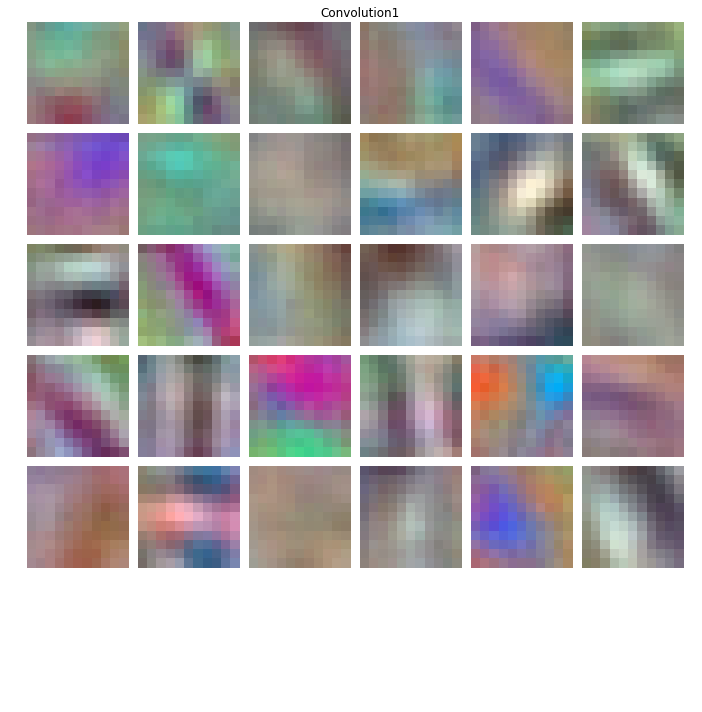

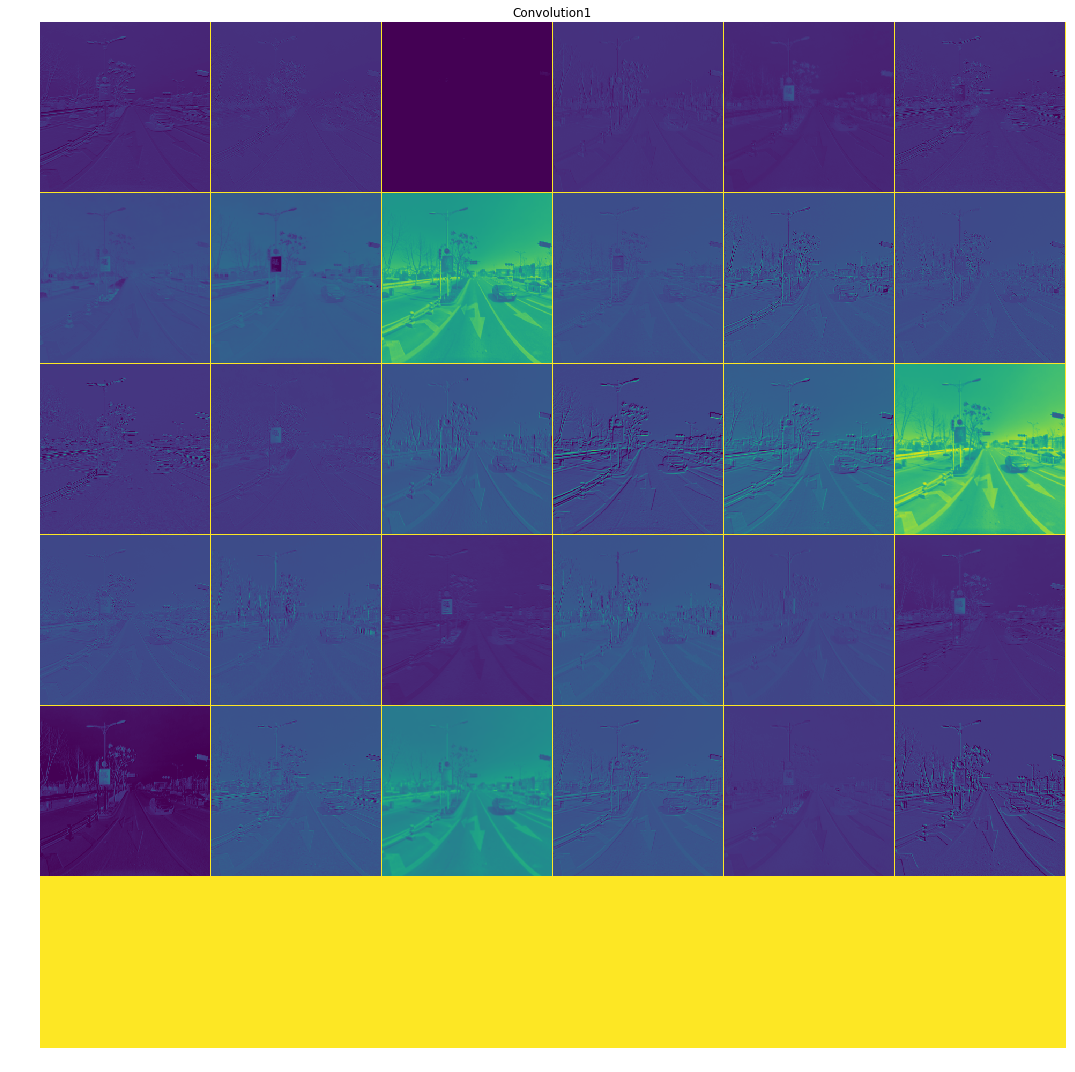

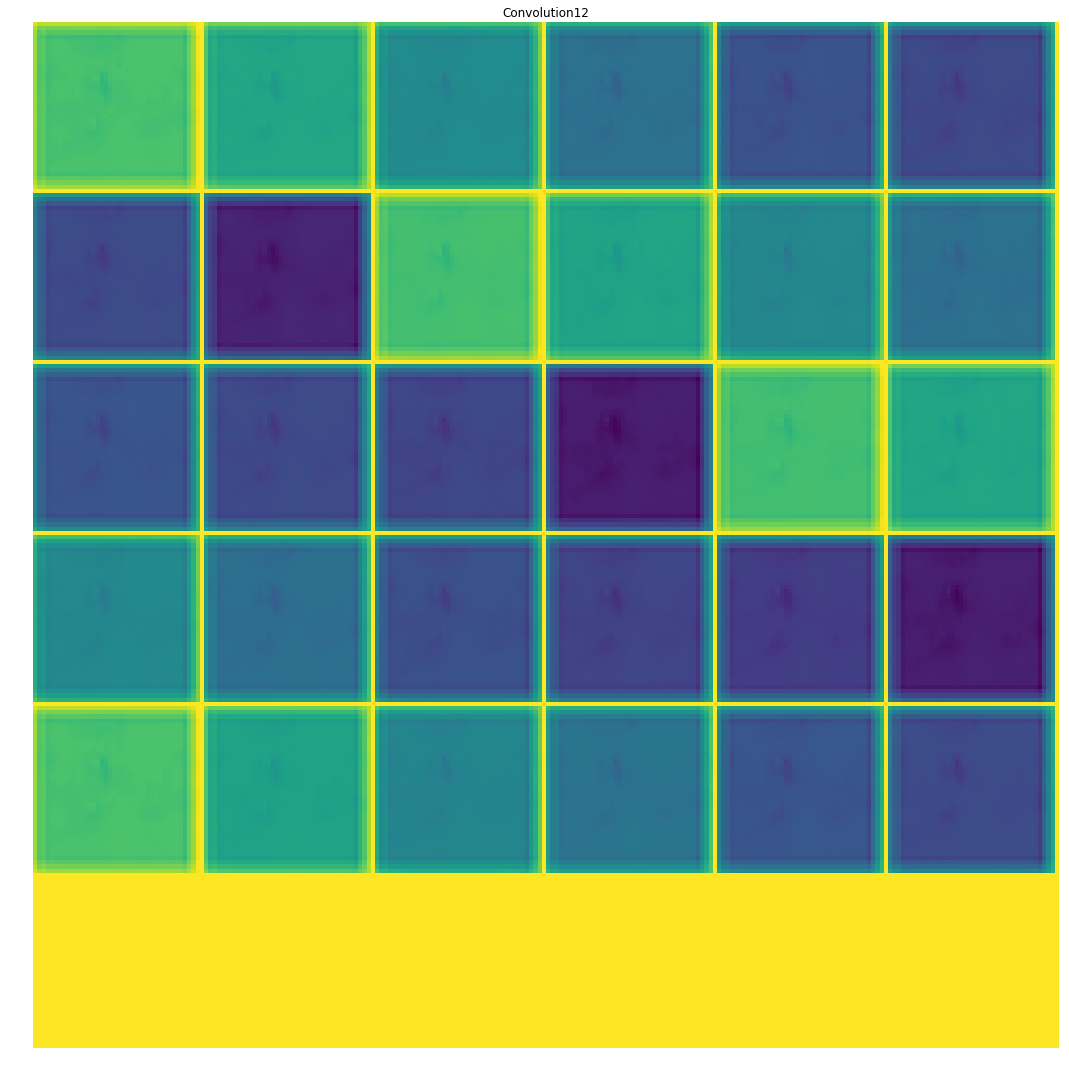

In [24]:
selected_layer_name_by_param = 'Convolution1'
selected_layer_name_by_blob1 = 'Convolution1'
selected_layer_name_by_blob2 = 'Convolution12'

def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    pl.tight_layout()
    pl.imshow(data); pl.axis('off')
    
    
#print "imgdata.shape:",imgdata.shape
#pl.figure(figsize=(10,10))
#pl.imshow(imgdata)

#pl.figure(figsize=(10,10))
#pl.imshow(origin_imgdata)

#print "origin_imgdata[:,:,[2,1,0]]:", origin_imgdata[:,:,[2,1,0]].shape
mean_subtracted_imgdata = origin_imgdata[:,:,[2,1,0]]*255. - mn
mean_subtracted_imgdata = (mean_subtracted_imgdata-mean_subtracted_imgdata.min())/(mean_subtracted_imgdata.max()-mean_subtracted_imgdata.min())

#pl.figure(figsize=(10,10))
#pl.imshow(mean_subtracted_imgdata[:,:,[2,1,0]])

print mean_subtracted_imgdata.shape

im_input = cv2.resize(mean_subtracted_imgdata, (1280, 1280))  # Test
#im_input = cv2.resize(mean_subtracted_imgdata, (640, 480))  # Train
im_input = im_input[:,:,[2,1,0]]
im_input = im_input.transpose(2, 0, 1,)
im_input = im_input[np.newaxis, :]

print im_input.shape


net.blobs['data'].data[...] = im_input

net.forward()

#print "net.params['Convolution5'][0].data.shape:",net.params['Convolution5'][0].data.shape
filters =  net.params[selected_layer_name_by_param][0].data.transpose(0, 2, 3, 1)
#print "net.params['Convolution5'][0].data.transpose(0, 2, 3, 1)[:,:,:,0:3]:",filters[:,:,:,0:3].shape

#print filters.shape
pl.figure(figsize=(10,10))
pl.title(selected_layer_name_by_param)
vis_square(filters[:30,:,:,:4])

feat = net.blobs[selected_layer_name_by_blob1].data[0, :30]
#print "net.blobs['Convolution5'].data:",net.blobs['Convolution5'].data.shape
#print "net.blobs['Convolution5'].data[0, :]:",feat.shape

pl.figure(figsize=(15,15))
pl.title(selected_layer_name_by_blob1)
vis_square(feat)

feat = net.blobs[selected_layer_name_by_blob2].data[0, :30]

pl.figure(figsize=(15,15))
pl.title(selected_layer_name_by_blob2)
vis_square(feat)